<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Pandas in action</font>
</h1>

<h1 align="left" style="line-height:200%;font-family:sans-serif;color:#0099cc">
<font face="sans-serif" color="#0099cc">
Part One</font>
</h1>

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:sans-serif;font-size:medium">
<font face="sans-serif" size="3">
1. First, import the necessary libraries.<br>
2. Then, read the corresponding dataset file (netflix_titles.csv). Note that the first column of this dataset (show_id) should be set as the DataFrame's index.<br>
3. Determine the data type and the number of missing values for each column. Find any duplicate data, count them, and if any exist, remove them. <br>
4. If a data entry has missing values in any of the country, cast, or director columns, remove it from the entire dataset.<br>
5. Find the thirty countries with the most produced works and create a bar chart for them.<br>
6. The duration column of the works is given as a string and is not practically analyzable. Convert it to a numerical format without the "min" suffix. Then, fill in the missing data with the average duration of each group.<br>
Note: Due to the clear unit of time measurement for TV shows and movies, we don't have an issue with losing the unit.
</font>
</p>

In [176]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=25

In [177]:
#2
original_df = pd.read_csv('netflix_titles.csv', index_col=0)
original_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [178]:
#3
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [179]:
original_df.duplicated().sum()

0

In [180]:
#3
original_df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#4
df = original_df.copy()
df.dropna(subset=['director', 'cast', 'country'], how='any', inplace=True)
df.isna().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          1
duration        3
listed_in       0
description     0
dtype: int64

In [ ]:
#5
country_count_df = df.copy()
country_count_df = pd.concat([country_count_df, df["country"].str.split(", ", expand = True)], axis = 1)
country_count_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,0,1,2,3,4,5,6,7
show_id,,,,,,,,,,,,,,,,,,,
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",United States,Ghana,Burkina Faso,United Kingdom,Germany,Ethiopia,None,None
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,United Kingdom,None,None,None,None,None,None,None
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,United States,None,None,None,None,None,None,None
s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Germany,Czech Republic,None,None,None,None,None,None
s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,India,None,None,None,None,None,None,None


In [183]:
country_count_df.drop(columns=['country'], inplace=True)
country_count_df = country_count_df.melt(id_vars = ["type", "title"], value_vars = range(8), value_name = "country")
country_count_df.head()

,type,title,variable,country
0,Movie,Sankofa,0,United States
1,TV Show,The Great British Baking Show,0,United Kingdom
2,Movie,The Starling,0,United States
3,Movie,Je Suis Karl,0,Germany
4,Movie,Jeans,0,India


C:\Users\USER\AppData\Local\Temp\ipykernel_17760\499748750.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(country_counts[:30].index,rotation=90)


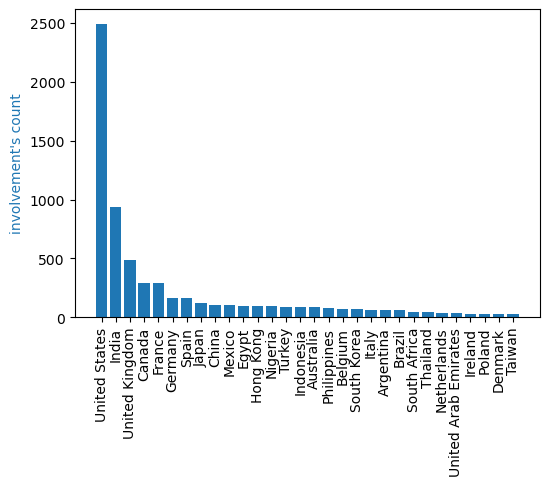

In [184]:
fig, axes = plt.subplots(figsize=(6,4))
country_counts = country_count_df.groupby('country').size().sort_values(ascending=False)
axes.bar(country_counts[:30].index, country_counts[:30].values)
axes.set_xticklabels(country_counts[:30].index,rotation=90)
axes.set_ylabel("involvement's count", color='#1f77b4');

In [ ]:
#6
duration_df = df.copy()
duration_df['duration'] = duration_df['duration'].str.extract(r'(\d+)')
duration_df['duration'].fillna('-1', inplace=True)
duration_df['duration'] = duration_df['duration'].astype(int)
duration_df['duration'].replace(-1, np.nan, inplace=True)
duration_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9.0,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...
s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...
s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166.0,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [186]:
filling_values = duration_df.groupby('type')['duration'].transform('mean')
duration_df['duration'].fillna(filling_values, inplace=True)
duration_df['duration'].isna().sum()

0

<h1 align="left" style="line-height:200%;font-family:sans-serif;color:#0099cc">
<font face="sans-serif" color="#0099cc">
Part Two</font>
</h1>

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:sans-serif;font-size:medium">
<font face="sans-serif" size="3">
7. Plot histogram and KDE charts for the duration of the movies. Is the distribution normal?<br>
8. Check how many works feature Brad Pitt in a role. List their names.<br>
9. The date_added column is stored as a string; convert this column to one with datetime values and add four columns for each work: year, month, day, and day_name.<br>
10. By plotting a pie chart, compare the proportion of works on the days of the week. Also, by plotting a bar chart, examine the monthly/yearly number of works.<br>
</font>
</p>

count    5189.000000
mean      102.703818
std        25.953464
min         8.000000
25%        89.000000
50%       101.000000
75%       117.000000
max       253.000000
Name: duration, dtype: float64

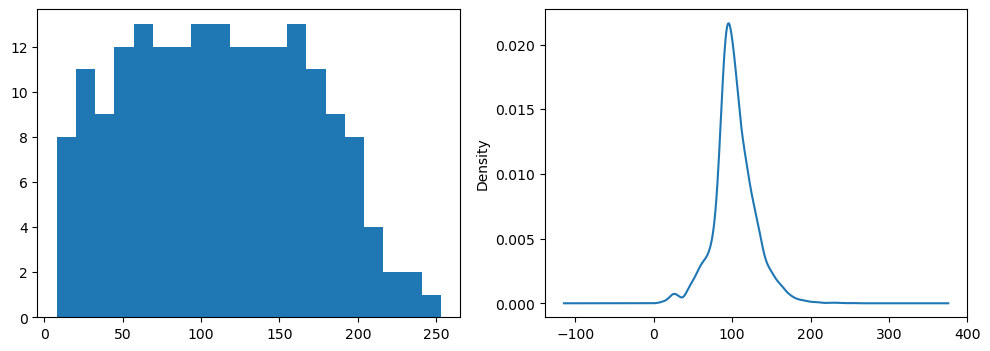

In [ ]:
#7
fig, axes = plt.subplots(1, 2, figsize=(12,4))
es = duration_df[duration_df['type'] == 'Movie']['duration'].value_counts().sort_index()
axes[0].hist(es.index, bins=20)
duration_df[duration_df['type'] == 'Movie']['duration'].plot(ax=axes[1], kind='kde')
duration_df[duration_df['type'] == 'Movie']['duration'].describe()

In [ ]:
#8
brad_pitt = df[df['cast'].str.contains('Brad Pitt') == True]
brad_pitt.shape[0]

8

In [189]:
brad_pitt['title'].values

array(['Killing Them Softly', 'By the Sea', 'War Machine',
       'A Stoning in Fulham County', 'Babel', 'Inglourious Basterds',
       "Ocean's Thirteen", "Ocean's Twelve"], dtype=object)

In [ ]:
#9
date_added_df = duration_df.copy()
date_added_df['date_added'] = pd.to_datetime(date_added_df['date_added'].str.strip())
date_added_df.dtypes

type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration               float64
listed_in               object
description             object
dtype: object

In [191]:
date_added_df["date_added_year"] = date_added_df["date_added"].dt.year
date_added_df["date_added_month"] = date_added_df["date_added"].dt.month
date_added_df["date_added_day"] = date_added_df["date_added"].dt.day
date_added_df["date_added_day_name"] = date_added_df["date_added"].dt.day_name()
date_added_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year,date_added_month,date_added_day,date_added_day_name
show_id,,,,,,,,,,,,,,,
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,24,Friday
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9.0,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,24,Friday
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,24,Friday
s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,23,Thursday
s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166.0,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021,9,21,Tuesday


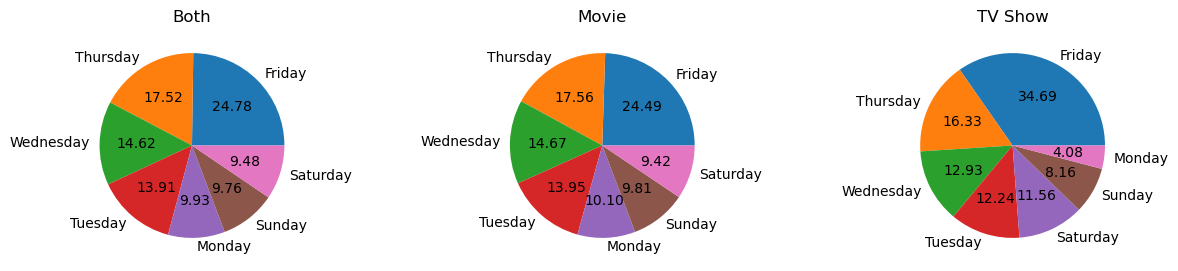

In [ ]:
#10
fig, axes = plt.subplots(1,3,figsize=(15,3))
date_added_df['date_added_day_name'].value_counts().plot(kind='pie', ax=axes[0], autopct = "%.2f").set_title('Both')
date_added_df[date_added_df['type']=='Movie']['date_added_day_name'].value_counts().plot(kind='pie', ax=axes[1], autopct = "%.2f").set_title('Movie')
date_added_df[date_added_df['type']=='TV Show']['date_added_day_name'].value_counts().plot(kind='pie', ax=axes[2], autopct = "%.2f").set_title('TV Show')

for ax in axes:
    ax.set_ylabel('')

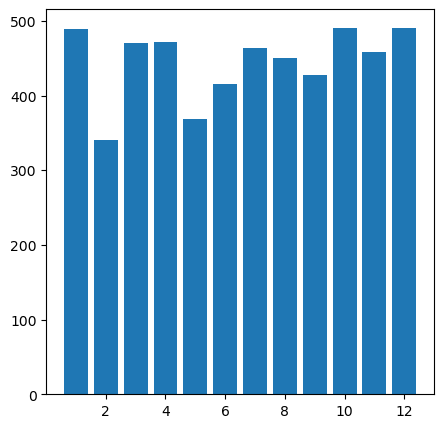

In [193]:
fig, ax = plt.subplots(figsize=(5,5))
res = date_added_df['date_added_month'].value_counts().sort_index()
ax.bar(res.index, res.values);

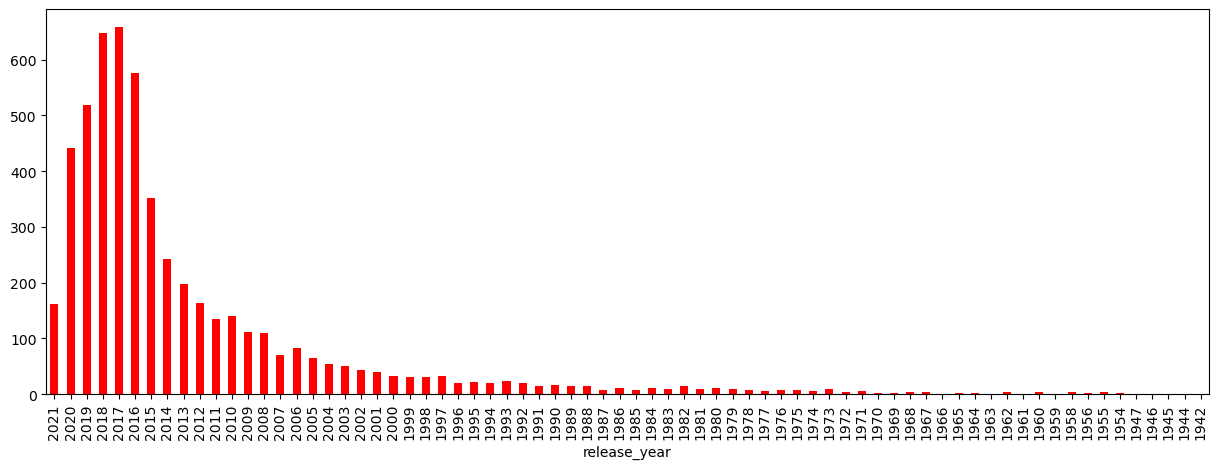

In [194]:
fig, ax = plt.subplots(figsize=(15,5))
year = date_added_df['release_year'].value_counts().sort_index(ascending=False)
year.plot(ax=ax, kind='bar', color='red');

<h1 align="left" style="line-height:200%;font-family:sans-serif;color:#0099cc">
<font face="sans-serif" color="#0099cc">
Part Three</font>
</h1>

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:sans-serif;font-size:medium">
<font face="sans-serif" size="3">
11. How many different categories are there for the works? List the 5 most popular categories.<br>
12. Calculate the average movie duration for each rating group.<br>
13. By plotting a heatmap, calculate the frequency of works in each rating for both groups.<br>
14. Who are the most prolific directors?<br>
15. By plotting a countplot, compare the number of ratings for the two groups.<br>
</font>
</p>

In [ ]:
#11
gp = duration_df[duration_df['type'] == 'Movie'].groupby('rating')['duration']
gp.mean()

rating
66 min      102.703818
74 min      102.703818
84 min      102.703818
G            92.300000
NC-17       146.000000
NR           96.362069
PG           99.029091
PG-13       108.900000
R           106.677378
TV-14       113.900595
TV-G         84.666667
TV-MA        97.408960
TV-PG       100.579327
TV-Y         56.535211
TV-Y7        65.871429
TV-Y7-FV     76.666667
UR          106.333333
Name: duration, dtype: float64

In [ ]:
#12
gp = duration_df[duration_df['type'] == 'TV Show'].groupby('rating')['duration']
round(gp.mean())

rating
TV-14    3.0
TV-G     1.0
TV-MA    1.0
TV-PG    2.0
TV-Y     1.0
TV-Y7    2.0
Name: duration, dtype: float64

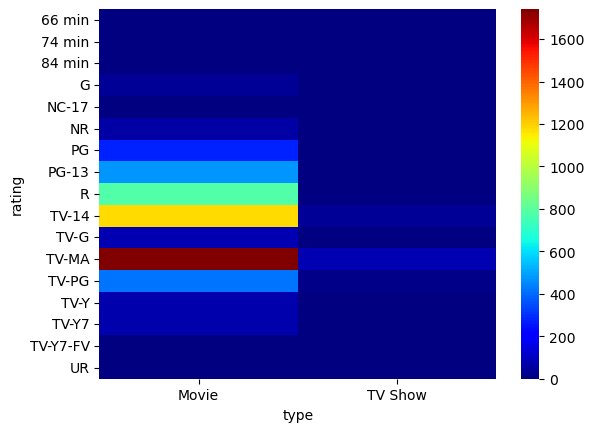

In [ ]:
#13
colormap = plt.colormaps['jet']
sns.heatmap(pd.crosstab(df["rating"], df["type"]), cmap = colormap);

In [ ]:
#14
director_df = duration_df.copy()
director_df = pd.concat([director_df, director_df['director'].str.split(', ', expand=True)], axis=1)
director_df.drop(columns=['director'], inplace=True)
director_df = director_df.melt(id_vars=['type', 'title'], value_vars=range(12), value_name='director')
director_df['director'].value_counts(ascending=False)

director
Jan Suter              21
Raúl Campos            19
Jay Karas              15
Marcus Raboy           15
Cathy Garcia-Molina    13
                       ..
Nuel Naval              1
Isao Yukisada           1
Nottapon Boonprakob     1
Xavier Gens             1
James Gunn              1
Name: count, Length: 4312, dtype: int64

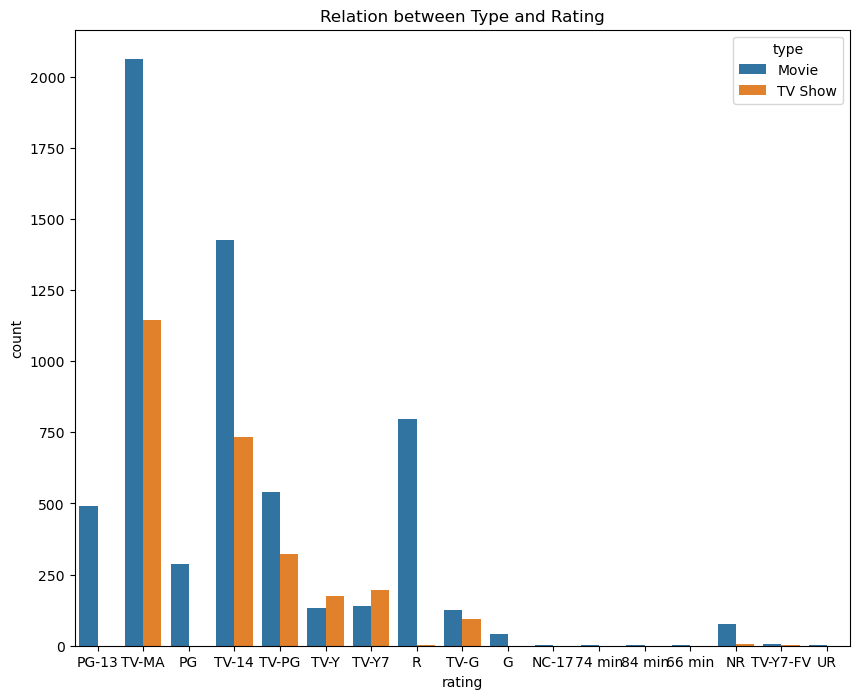

In [ ]:
#15
import seaborn as sns

plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=original_df)
plt.title('Relation between Type and Rating')
plt.show()

<h1 align="left" style="line-height:200%;font-family:sans-serif;color:#0099cc">
<font face="sans-serif" color="#0099cc">
Part Four</font>
</h1>

<p dir="ltr" style="direction: ltr;text-align: justify;line-height:200%;font-family:sans-serif;font-size:medium">
<font face="sans-serif" size="3">
16. List all the genres.<br>
17. Using the WordCloud library, create an image containing keywords from the title/description.<br>
18. Perform one-hot encoding on the `type` column. Explain the purpose of this change.<br>
</font>
</p>

In [ ]:
#16
df[df['listed_in'].str.contains(',') == False]['listed_in'].unique()

array(['Comedies', 'Thrillers', 'Action & Adventure', 'Dramas',
       'Horror Movies', 'Stand-Up Comedy', 'TV Shows', 'Documentaries',
       'Movies', 'Children & Family Movies', 'Reality TV', 'TV Dramas',
       'Docuseries', "Kids' TV", 'Music & Musicals', 'Romantic Movies',
       'TV Comedies', 'Stand-Up Comedy & Talk Shows', 'Sci-Fi & Fantasy',
       'Independent Movies', 'Anime Features'], dtype=object)

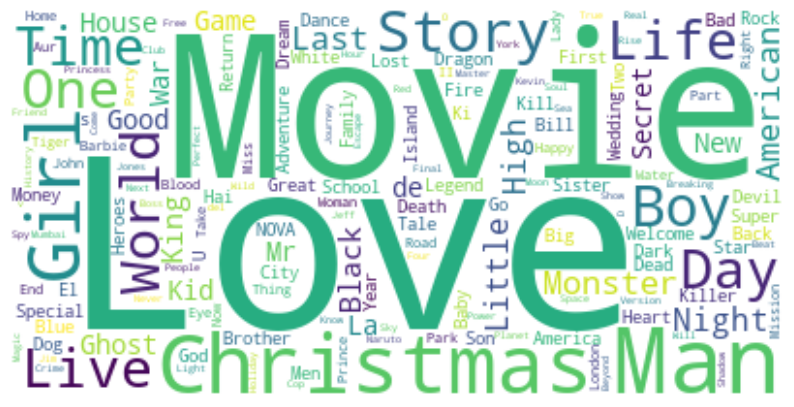

In [ ]:
#17
from wordcloud import WordCloud

text = " ".join(title for title in df.title)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (10, 6))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

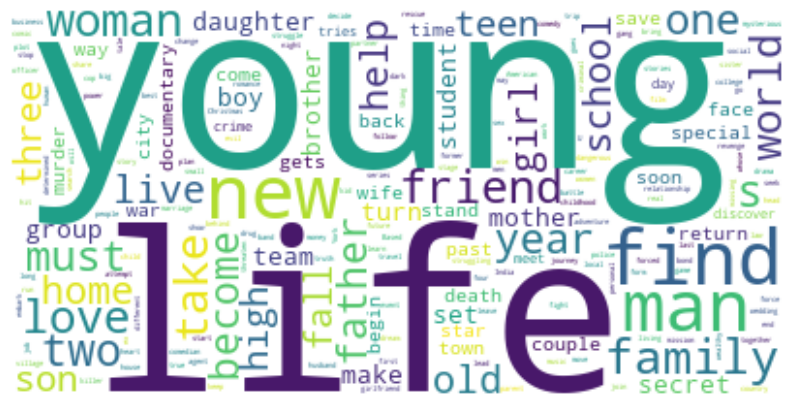

In [203]:
from wordcloud import WordCloud
text = " ".join(description for description in df['description'])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (10, 6))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
#18
one_hot_df = duration_df.copy()
one_hot_df = pd.get_dummies(one_hot_df, columns=['type'])
one_hot_df

,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_Movie,type_TV Show
show_id,,,,,,,,,,,,
s8,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",True,False
s9,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9.0,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,False,True
s10,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...,True,False
s13,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...,True,False
s25,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166.0,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
s8802,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96.0,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,True,False
s8803,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158.0,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",True,False
s8805,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88.0,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,True,False
